# EDA (Exploratory Data Analysis) 탐색적 데이터 분석
- Data Collection & Integration
- Data Preparing & Cleaning
- Data Visualization & Analysis


* 주문, 상품, 회원정보 데이터 결합
* 주분 구분에서 4가지 값(환불완료, 결제취소, 주문취소, 환불신청)은 제외

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

df_order1 = pd.read_excel (r'3.1 주문정보(개인정보 제외)_추출.xlsx')
df_items1 = pd.read_excel (r'2.1 상품정보_추출.xlsx')
df_customer1 = pd.read_excel (r'1.1 고객기본정보(개인정보 제외)_추출.xlsx')


In [2]:
df_order1.head()

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882


In [3]:
df_order1.dtypes

주문번호        int64
순번          int64
주문일시       object
진행구분       object
배송지        object
상품번호       object
상품명        object
옵션명        object
수량          int64
판매가       float64
배송비       float64
쿠폰할인액     float64
회원주문여부     object
회원번호        int64
dtype: object

In [4]:
# datetime형으로 변경 : 주문일시
df_order1['주문일시'] = pd.to_datetime(df_order1['주문일시'])

In [5]:
df_order1['주문일자'] = df_order1['주문일시'].dt.date

In [6]:
df_items1.head()

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
0,G1708291036_0216,[라이마스] 에어_630630,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,50000.00 이하 5500.00,품절,N
1,G1708291049_0217,[라이마스] 에어_730350,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,50000.00 이하 5500.00,품절,N
2,G1708291054_0220,[라이마스] 에어_1200190,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0,50000.00 이하 5500.00,판매중,Y
3,G1708291058_0221,[라이마스] 에어_730190,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0,50000.00 이하 5500.00,판매중,Y
4,G1708291109_0222,[라이마스] 에어_730750,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0,50000.00 이하 5500.00,품절,N


In [7]:
df_items1.shape

(110798, 10)

In [8]:
df_order1.shape

(24766, 15)

In [9]:
df_items2 = df_items1.copy()
df_items2.head(2)

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
0,G1708291036_0216,[라이마스] 에어_630630,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,50000.00 이하 5500.00,품절,N
1,G1708291049_0217,[라이마스] 에어_730350,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,50000.00 이하 5500.00,품절,N


In [10]:
df_items2.drop(columns = ['상품명', '배송비'], inplace = True) # 상품정보의 상품명/배송비 컬럼 삭제

In [11]:
df_items2.head()

,상품번호,업체명,카테고리명,브랜드명,상품구분,대표판매가,판매상태,전시상태
0,G1708291036_0216,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,품절,N
1,G1708291049_0217,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,품절,N
2,G1708291054_0220,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0,판매중,Y
3,G1708291058_0221,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0,판매중,Y
4,G1708291109_0222,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0,품절,N


In [12]:
# 주문과 상품정보 결합

df_solditems1 = pd.merge(df_order1, df_items2, on = '상품번호', how='left')
df_solditems1.head(10)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,...,회원주문여부,회원번호,주문일자,업체명,카테고리명,브랜드명,상품구분,대표판매가,판매상태,전시상태
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,...,Y,1876,2017-11-08,에이젯,임직원 매장,KERAMIKA,일반,48840.0,판매중지,Y
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,...,Y,1876,2017-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,...,Y,1882,2017-11-08,(주)캔디코퍼레이션,임직원 매장,Laundress,일반,16200.0,판매중지,Y
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,...,Y,1882,2017-11-08,에스피플,임직원 매장,TREBIEN,일반,35040.0,판매중지,Y
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,...,Y,1882,2017-11-08,(주)캔디코퍼레이션,임직원 매장,Laundress,일반,16200.0,판매중지,Y
5,1711080950452173,1,2017-11-08 09:51:13,주문취소,서울 영등포구 국제금융로 10,G1710311906_7080,(임직원 전용)[쉐우드가구] 발레린 원목 침대 Q퀸(독립스프링 매트리스 포함),NaN,1,960000.0,...,Y,1873,2017-11-08,쉐우드,임직원 매장,SHERWOOD,일반,960000.0,판매중지,N
6,1711081128212184,1,2017-11-08 11:28:47,주문취소,서울 영등포구 국제금융로 10,G1710311848_6934,(임직원 전용)[하츠] 직접 설치하는 이지 셀프 주방 렌지후드 (DIY 후드),색상:아쿠아블루_ES-60AB,1,84000.0,...,Y,1873,2017-11-08,하츠,임직원 매장,HAATZ,일반,84000.0,판매중,N
7,1711081303002187,1,2017-11-08 13:04:02,환불완료,서울 영등포구 국제금융로2길 32,G1710131404_3328,[전동댐퍼] MDD-P100DP-P,NaN,1,39900.0,...,Y,1877,2017-11-08,힘펠,공구/철물/목재/리폼,HIMPEL,일반,40000.0,판매중,Y
8,1711081500162192,1,2017-11-08 15:00:34,주문취소,서울 영등포구 국제금융로 10,G1710171320_3622,(임직원 전용)[아름다운공간] 르리에 원목받침 스텐수저통 2 style (1단/2단),구성:2단(원목받침+수저통2P),1,18000.0,...,Y,1873,2017-11-08,아름다운공간,임직원 매장,BEAUTIFULROOM,일반,18000.0,품절,N
9,1711081622542202,1,2017-11-08 16:23:17,주문취소,경기 부천시 신흥로 150-1,G1711011727_7485,(임직원 전용)[루나스퀘어] 루나스피어 북유럽풍 국민수유등_IoT 감성조명,NaN,1,59400.0,...,Y,1888,2017-11-08,(주)엠앤지인터내셔널,임직원 매장,LUNASQUARE,일반,59400.0,판매중지,N


In [13]:
df_solditems1.shape

(24766, 22)

In [14]:
df_customer1.head(2)

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6


In [15]:
df_customer2 = df_customer1.copy()
df_customer2.head(2)

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6


In [16]:
df_solditems1.columns.unique()

Index(['주문번호', '순번', '주문일시', '진행구분', '배송지', '상품번호', '상품명', '옵션명', '수량', '판매가',
       '배송비', '쿠폰할인액', '회원주문여부', '회원번호', '주문일자', '업체명', '카테고리명', '브랜드명',
       '상품구분', '대표판매가', '판매상태', '전시상태'],
      dtype='object')

In [17]:
df_customer2.columns.unique()

Index(['회원번호', '회원등급', '가입일', '최종방문일', '본인인증', '성별', '나이', '자주쓰는배송지 도로명',
       '자주쓰는배송지 지번'],
      dtype='object')

In [18]:
df_customer2.drop (columns = ['가입일', '최종방문일', '본인인증', '자주쓰는배송지 도로명', '자주쓰는배송지 지번'], inplace = True)

In [19]:
df_customer2.head(2)

,회원번호,회원등급,성별,나이
0,1476,임직원,M,31
1,1873,임직원,M,32


In [20]:
df_solditems2 = pd.merge(df_solditems1, df_customer2,on = '회원번호', how='left' )
df_solditems2.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,...,업체명,카테고리명,브랜드명,상품구분,대표판매가,판매상태,전시상태,회원등급,성별,나이
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,...,에이젯,임직원 매장,KERAMIKA,일반,48840.0,판매중지,Y,임직원,M,30
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,임직원,M,30


In [21]:
df_solditems2.shape

(24766, 25)

In [22]:
df_solditems2.isnull().sum()

주문번호          0
순번            0
주문일시          0
진행구분          0
배송지          64
상품번호          0
상품명           0
옵션명       15195
수량            0
판매가           0
배송비           0
쿠폰할인액         0
회원주문여부        0
회원번호          0
주문일자          0
업체명         248
카테고리명       288
브랜드명        933
상품구분       1758
대표판매가       248
판매상태        248
전시상태        248
회원등급       4430
성별         4430
나이        17959
dtype: int64

In [23]:
df_solditems3 = df_solditems2.copy()

In [24]:
df_solditems3.drop(df_solditems3[df_solditems3['진행구분'] == '환불완료'].index, inplace=True)
df_solditems3.drop(df_solditems3[df_solditems3['진행구분'] == '결제취소'].index, inplace=True)
df_solditems3.drop(df_solditems3[df_solditems3['진행구분'] == '환불신청'].index, inplace=True)
df_solditems3.drop(df_solditems3[df_solditems3['진행구분'] == '주문취소'].index, inplace=True)

In [25]:
# 주분 구분 제외 항목(환불완료, 결제취소, 주문취소, 환불신청)
#df.drop(df_order1[df_order1["진행구분"] == '환불완료'].index, inplace=True)

#langs = ['구매확정','교환완료','배송준비중','배송완료','주문완료']
#filt = df1['진행구분'].isin(langs)
#df10 = df1[filt]
#df10

In [26]:
df_solditems3.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,...,업체명,카테고리명,브랜드명,상품구분,대표판매가,판매상태,전시상태,회원등급,성별,나이
12,1711091120092237,1,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,G1709201602_1482,[3M] 작업용 보호안경,NaN,5,16000.0,...,하우스플러스(주),벽지/바닥재/타일,책임 크레텍,일반,3200.0,판매중지,N,임직원,M,46
13,1711091146582243,1,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,G1710161420_3420,[씨원] 듀얼 프리미엄 3단요추의자,색상:와인,1,52900.0,...,에이젯,학생/사무/유아동가구,CONE,일반,52900.0,판매중,N,임직원,M,45


In [27]:
df_solditems3.shape # 주분 구분 제외 항목(환불완료, 결제취소, 주문취소, 환불신청) : 4054 건 제외 됨

(20712, 25)

In [28]:
df_solditems3.columns.unique()

Index(['주문번호', '순번', '주문일시', '진행구분', '배송지', '상품번호', '상품명', '옵션명', '수량', '판매가',
       '배송비', '쿠폰할인액', '회원주문여부', '회원번호', '주문일자', '업체명', '카테고리명', '브랜드명',
       '상품구분', '대표판매가', '판매상태', '전시상태', '회원등급', '성별', '나이'],
      dtype='object')

In [29]:
df_solditems3 = \
df_solditems3.drop(columns = ['순번', '상품번호', '옵션명', '배송비', '쿠폰할인액', '회원주문여부', '상품구분', '대표판매가', '판매상태', '전시상태', '회원등급'])
# 불필요 컬럼 정리

In [30]:
df_solditems3.head(2)

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이
12,1711091120092237,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,[3M] 작업용 보호안경,5,16000.0,1972,2017-11-09,하우스플러스(주),벽지/바닥재/타일,책임 크레텍,M,46
13,1711091146582243,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,[씨원] 듀얼 프리미엄 3단요추의자,1,52900.0,2005,2017-11-09,에이젯,학생/사무/유아동가구,CONE,M,45


In [31]:
df_solditems3.배송지

12          강원 춘천시 동산면 영서로 915
13        경기 고양시 일산서구 고양대로 633
14         인천 연수구 송도과학로27번길 30
16          서울 영등포구 국제금융로2길 32
17        세종특별자치시 금남면 두만길 12-1
                 ...          
24761    경남 진주시 내동면 순환로 425-61
24762       충북 청주시 상당구 단재로 316
24763       충북 청주시 상당구 단재로 316
24764       충북 청주시 상당구 단재로 316
24765           전남 광양시 진등2길 13
Name: 배송지, Length: 20712, dtype: object

In [32]:
df_solditems3['배송지역'] = df_solditems3['배송지'].str.split(' ').str[0]

In [33]:
df_solditems3['배송지역'].unique()

array(['강원', '경기', '인천', '서울', '세종특별자치시', '전남', '대전', '충남', '광주', '경기도',
       '경남', '전북', '충북', '경북', '부산', nan, '대구', '울산', '서울특별시', '인천광역시',
       '제주특별자치도', '호계e편한세상아파트', '전라북도', '라도무스', '죽전벽산5단지', '테헤란로',
       '102*301', '서울시', '대구광역시'], dtype=object)

In [34]:
df_solditems3.replace({'배송지역':{'세종특별자치시':'세종'}}, inplace = True)
df_solditems3.replace({'배송지역':{'인천광역시':'인천'}}, inplace = True)
df_solditems3.replace({'배송지역':{'제주특별자치도':'제주'}}, inplace = True)
df_solditems3.replace({'배송지역':{'서울시':'서울'}}, inplace = True)
df_solditems3.replace({'배송지역':{'대구광역시':'대구'}}, inplace = True)
df_solditems3.replace({'배송지역':{'전라북도':'전북'}}, inplace = True)
df_solditems3.replace({'배송지역':{'테헤란로':'서울'}}, inplace = True)
df_solditems3.replace({'배송지역':{'경기도':'경기'}}, inplace = True)

In [100]:
df_solditems3['배송지역'].unique()

array(['강원', '경기', '인천', '서울', '세종', '전남', '대전', '충남', '광주', '경남', '전북',
       '충북', '경북', '부산', nan, '대구', '울산', '제주'], dtype=object)

In [36]:
df_solditems3 [df_solditems3['배송지역'] == '호계e편한세상아파트' ] # 경기

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이,배송지역
3493,1805181000457907,2018-05-18 10:01:21,구매확정,호계e편한세상아파트,[반반데이특가] [SONY] PlayStation4 Slim 500GB 블랙_CUH...,1,219000.0,39407,2018-05-18,(주)라이온그룹코리아,생활가전,SONY,-,NaN,호계e편한세상아파트


In [37]:
df_customer1 [df_customer1['회원번호'] == 39407] 

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
32652,39407,일반,2018-05-17 17:02:18,2018-05-25 09:22:05,MOBILE,-,NaN,호계e편한세상아파트,경기 안양시 동안구 호계동 813


In [38]:
df_solditems3 [df_solditems3['배송지역'] == '라도무스' ] # 경기

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이,배송지역
6203,1806241002447669,2018-06-24 10:02:58,구매확정,라도무스,[Hot Deal][LG전자] 미니빔 프로젝터 TV_PF50KA,1,799000.0,39978,2018-06-24,(주)이파트너스,생활가전,LG ELECTRONICS,-,NaN,라도무스
10235,1807231000148665,2018-07-23 10:00:42,구매확정,라도무스,[게릴라특가][소니] 액션캠_FDR-X3000R,1,529000.0,39978,2018-07-23,(주)디카몰,NaN,SONY,-,NaN,라도무스
15686,1809081001544589,2018-09-08 10:02:07,구매확정,라도무스,[할인대첩][소니]WH-1000XM2 무선 노이즈캔슬링 헤드폰,1,389000.0,39978,2018-09-08,현민무역 주식회사,생활가전,SONY,-,NaN,라도무스


In [39]:
df_customer1 [df_customer1['회원번호'] == 39978] 

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
33112,39978,일반,2018-05-21 10:03:17,2018-10-15 18:53:29,MOBILE,-,NaN,경기 광주 이배재로 277-15번길,경기 광주 이배재로 277-15번길


In [40]:
df_solditems3 [df_solditems3['배송지역'] == '죽전벽산5단지' ] # 경기 

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이,배송지역
9361,1807192137386489,2018-07-19 21:41:44,구매확정,죽전벽산5단지 501동 502호,[게릴라특가][샤오미] 드라이버 세트_JXLSD01XH,1,22200.0,44423,2018-07-19,(주)여우미,공구/철물/목재/리폼,XIAOMI,M,NaN,죽전벽산5단지


In [41]:
df_customer1 [df_customer1['회원번호'] == 44423] 

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
37286,44423,일반,2018-07-19 21:31:38,2018-07-19 21:31:51,MOBILE,M,NaN,경기 용인시 수지구 용구대로2801번길 29,경기 용인시 수지구 죽전동 947-1


In [42]:
df_solditems3 [df_solditems3['배송지역'] == '102*301' ]  # 경기

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이,배송지역
16794,1809131748407655,2018-09-13 17:49:02,구매확정,102*301,[창신리빙] 새싹빨래판,1,4900.0,39978,2018-09-13,창신리빙,주방/욕실/청소용품,창신리빙,-,NaN,102*301


In [43]:
df_customer1 [df_customer1['회원번호'] == 39978] 

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
33112,39978,일반,2018-05-21 10:03:17,2018-10-15 18:53:29,MOBILE,-,NaN,경기 광주 이배재로 277-15번길,경기 광주 이배재로 277-15번길


In [44]:
df_solditems3.replace({'배송지역':{'호계e편한세상아파트':'경기'}}, inplace = True)
df_solditems3.replace({'배송지역':{'라도무스':'경기'}}, inplace = True)
df_solditems3.replace({'배송지역':{'죽전벽산5단지':'경기'}}, inplace = True)
df_solditems3.replace({'배송지역':{'102*301':'경기'}}, inplace = True)

In [45]:
df_solditems3.replace({'배송지역':{'서울특별시':'서울'}}, inplace = True)

In [101]:
df_solditems3['배송지역'].unique()

array(['강원', '경기', '인천', '서울', '세종', '전남', '대전', '충남', '광주', '경남', '전북',
       '충북', '경북', '부산', nan, '대구', '울산', '제주'], dtype=object)

In [102]:
df_solditems3['배송지역'].nunique()

17

In [109]:
df_solditems3.shape

(20712, 15)

In [115]:
df_solditems3.isnull().sum()

주문번호         0
주문일시         0
진행구분         0
배송지         54
상품명          0
수량           0
판매가          0
회원번호         0
주문일자         0
업체명         81
카테고리명      117
브랜드명       628
성별        3657
나이       15605
배송지역        54
dtype: int64

In [47]:
df_solditems3.head(3)

,주문번호,주문일시,진행구분,배송지,상품명,수량,판매가,회원번호,주문일자,업체명,카테고리명,브랜드명,성별,나이,배송지역
12,1711091120092237,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,[3M] 작업용 보호안경,5,16000.0,1972,2017-11-09,하우스플러스(주),벽지/바닥재/타일,책임 크레텍,M,46,강원
13,1711091146582243,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,[씨원] 듀얼 프리미엄 3단요추의자,1,52900.0,2005,2017-11-09,에이젯,학생/사무/유아동가구,CONE,M,45,경기
14,1711091330402269,2017-11-09 13:33:28,구매확정,인천 연수구 송도과학로27번길 30,[케라미카] 바뎀 도자기 시리즈 파티 세트 (8p),1,43000.0,1953,2017-11-09,에이젯,주방/욕실/청소용품,KERAMIKA,M,50,인천


In [48]:
df_solditems3.isnull().sum()

주문번호         0
주문일시         0
진행구분         0
배송지         54
상품명          0
수량           0
판매가          0
회원번호         0
주문일자         0
업체명         81
카테고리명      117
브랜드명       628
성별        3657
나이       15605
배송지역        54
dtype: int64

In [49]:
# 주문일자 별 주문 건수 추출
df_dailyorder = df_solditems3.groupby('주문일자').주문일시.count().to_frame()
df_dailyorder.head()

,주문일시
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59


In [50]:
# 주문일자별 주문건수 시각화
df_dailyorder.columns = ['주문건수']
df_dailyorder

,주문건수
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59
...,...
2018-11-03,58
2018-11-04,61
2018-11-05,138


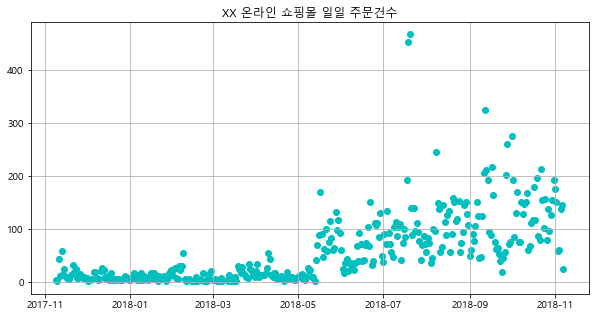

In [51]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_dailyorder.index, df_dailyorder.values, marker = 'o', color = 'c')
plt.grid()
plt.title('XX 온라인 쇼핑몰 일일 주문건수')
plt.show()

In [52]:
# 주문일자 별 판매액 추출
df_dailysales = df_solditems3.groupby('주문일자').판매가.sum().to_frame()
df_dailysales.head()

,판매가
주문일자,
2017-11-09,111900.0
2017-11-10,59400.0
2017-11-11,2139248.0
2017-11-12,1061900.0
2017-11-13,3073850.0


In [53]:
# 주문일자별 주문건수 시각화
df_dailysales.columns = ['판매액']
df_dailysales

,판매액
주문일자,
2017-11-09,111900.0
2017-11-10,59400.0
2017-11-11,2139248.0
2017-11-12,1061900.0
2017-11-13,3073850.0
...,...
2018-11-03,3134453.0
2018-11-04,3438570.0
2018-11-05,9387570.0


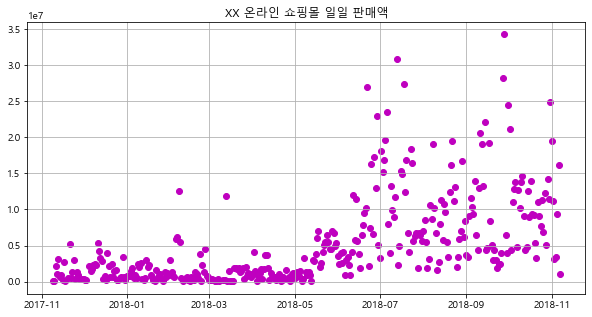

In [54]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_dailysales.index, df_dailysales.values, marker = 'o', color = 'm')
plt.grid()
plt.title('XX 온라인 쇼핑몰 일일 판매액')
plt.show()

In [55]:
df_solditems3.isnull().sum()

주문번호         0
주문일시         0
진행구분         0
배송지         54
상품명          0
수량           0
판매가          0
회원번호         0
주문일자         0
업체명         81
카테고리명      117
브랜드명       628
성별        3657
나이       15605
배송지역        54
dtype: int64

In [56]:
df_solditems3.shape

(20712, 15)

In [57]:
# 컬럼별 결측값 비율 (%)

print('배송지역 누락 값 비율 : ', '{0:.2g}'.format((54/20712)*100))
print('업체명 누락 값 비율 : ', '{0:.2g}'.format((81/20712)*100))
print('카테고리명 누락 값 비율 : ', '{0:.2g}'.format((117/20712)*100))
print('브랜드명 누락 값 비율 : ', '{0:.2g}'.format((628/20712)*100))
print('성별 누락 값 비율 : ', '{0:.2g}'.format((3657/20712)*100))
print('나이 누락 값 비율 : ', '{0:.2g}'.format((15605/20712)*100))

배송지역 누락 값 비율 :  0.26
업체명 누락 값 비율 :  0.39
카테고리명 누락 값 비율 :  0.56
브랜드명 누락 값 비율 :  3
성별 누락 값 비율 :  18
나이 누락 값 비율 :  75


In [58]:
df_solditems3.배송지역.nunique()

17

In [59]:
df_solditems3.업체명.nunique()

265

In [60]:
df_solditems3.카테고리명.nunique()

19

In [61]:
# 카테고리별 주문 건수 추출
df_category = df_solditems3.groupby('카테고리명').주문번호.count().to_frame()
df_category.columns = ['주문건수']
df_category.shape

(19, 1)

In [62]:
df_category_sort = df_category.sort_values(by='주문건수', ascending=False)

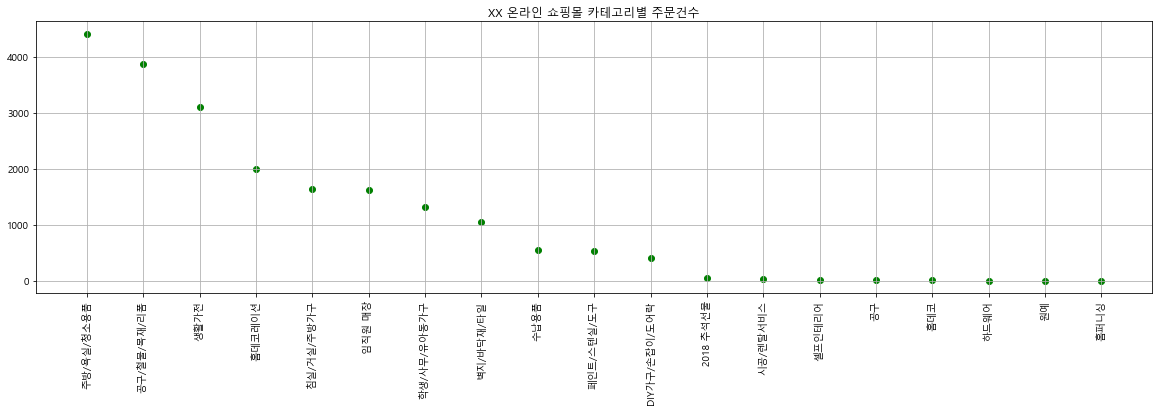

In [63]:
plt.rcParams['figure.figsize']=(20,5)

plt.scatter(df_category_sort.index, df_category_sort.values, marker = 'o', color = 'g')
plt.xticks(df_category_sort.index, rotation = 90 )
plt.grid()
plt.title('XX 온라인 쇼핑몰 카테고리별 주문건수')
plt.show()

In [64]:
# 배송지역별 주문 건수 추출
df_areas = df_solditems3.groupby('배송지역').주문번호.count().to_frame()
df_areas.columns = ['주문건수']
df_areas.shape

(17, 1)

In [65]:
df_areas_sort = df_areas.sort_values(by='주문건수', ascending=False)

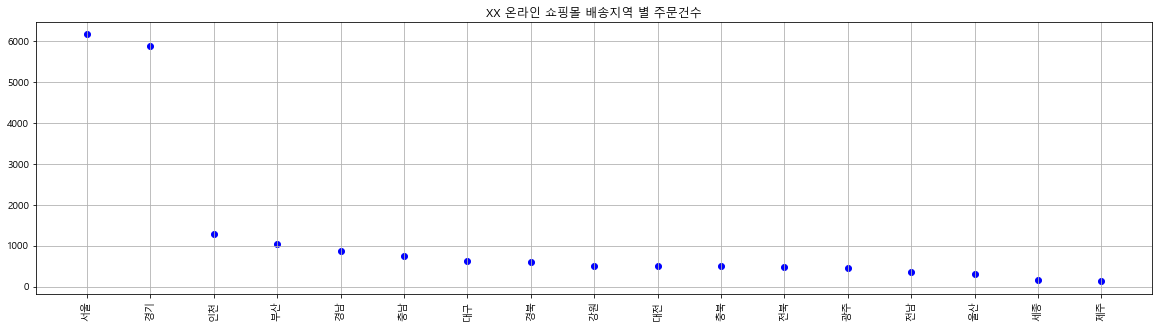

In [66]:
plt.rcParams['figure.figsize']=(20,5)

plt.scatter(df_areas_sort.index, df_areas_sort.values, marker = 'o', color = 'b')
plt.xticks(df_areas_sort.index, rotation = 90 )
plt.grid()
plt.title('XX 온라인 쇼핑몰 배송지역 별 주문건수')
plt.show()

In [67]:
# 배송지역별 주문 건수 추출
df_areasales = df_solditems3.groupby('배송지역').판매가.sum().to_frame()
df_areasales.columns = ['판매액']
df_areasales.shape

(17, 1)

In [68]:
df_areasales = df_areasales.sort_values(by='판매액', ascending=False)

In [69]:
df_areasales.head()

,판매액
배송지역,
서울,607670804.0
경기,541347666.0
인천,140314108.0
부산,78905224.0
경남,66735161.0


In [70]:
df_areasales.tail()

,판매액
배송지역,
광주,35503044.0
전남,31676650.0
울산,21696830.0
제주,13813340.0
세종,11408217.0


In [71]:
df_areasales_sort = df_areasales.sort_values(by='판매액', ascending=False)

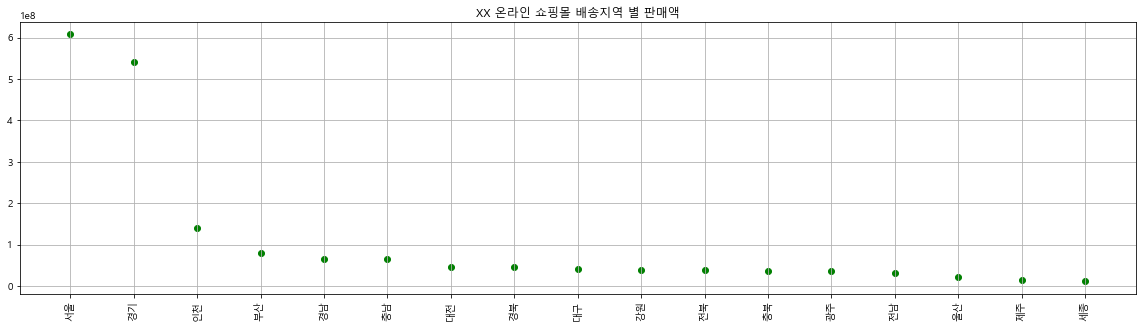

In [72]:
plt.rcParams['figure.figsize']=(20,5)


plt.scatter(df_areasales_sort.index, df_areasales_sort.values, marker = 'o', color = 'g')
plt.xticks(df_areasales_sort.index, rotation = 90 )
plt.grid()
plt.title('XX 온라인 쇼핑몰 배송지역 별 판매액')
plt.show()

In [73]:
df_dailyorder.shape

(359, 1)

In [74]:
df_dailyorder.head()

,주문건수
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59


In [75]:
df_dailysales.head()

,판매액
주문일자,
2017-11-09,111900.0
2017-11-10,59400.0
2017-11-11,2139248.0
2017-11-12,1061900.0
2017-11-13,3073850.0


In [76]:
df_dailysales.shape

(359, 1)

In [77]:
df_daily = pd.merge(df_dailyorder, df_dailysales, on = '주문일자')
df_daily.head()
#df_solditems2 = pd.merge(df_solditems, df_customer2,on = '회원번호', how='left' )

,주문건수,판매액
주문일자,,
2017-11-09,3,111900.0
2017-11-10,1,59400.0
2017-11-11,43,2139248.0
2017-11-12,11,1061900.0
2017-11-13,59,3073850.0


In [78]:
df_daily.tail()

,주문건수,판매액
주문일자,,
2018-11-03,58,3134453.0
2018-11-04,61,3438570.0
2018-11-05,138,9387570.0
2018-11-06,145,16132494.0
2018-11-07,25,1076300.0


In [79]:
df_daily.reset_index(drop=False, inplace =True)

In [80]:
# 영업일이 없는 경우도 있어서 주문일자 시작을 기준으로 경과일수 산출

days = []
for i in range(359) :
    d= df_daily['주문일자'][i] - df_daily['주문일자'][0]
    days.append(d)

In [81]:
df_daily['영업일수경과'] = days

In [82]:
df_daily.head()

,주문일자,주문건수,판매액,영업일수경과
0,2017-11-09,3,111900.0,0 days
1,2017-11-10,1,59400.0,1 days
2,2017-11-11,43,2139248.0,2 days
3,2017-11-12,11,1061900.0,3 days
4,2017-11-13,59,3073850.0,4 days


In [83]:
df_daily.tail()

,주문일자,주문건수,판매액,영업일수경과
354,2018-11-03,58,3134453.0,359 days
355,2018-11-04,61,3438570.0,360 days
356,2018-11-05,138,9387570.0,361 days
357,2018-11-06,145,16132494.0,362 days
358,2018-11-07,25,1076300.0,363 days


In [84]:
df_daily['영업일수경과'][0:359]

0       0 days
1       1 days
2       2 days
3       3 days
4       4 days
        ...   
354   359 days
355   360 days
356   361 days
357   362 days
358   363 days
Name: 영업일수경과, Length: 359, dtype: timedelta64[ns]

In [85]:
ftest = open('days.txt', mode='r')
lines = ftest.readlines()
print('successful')

successful


In [86]:
lines[358]

'358   363 days'

In [87]:
l = []
for line in lines : 
    a = line.split('   ')
    l.append(a)
l1=[]
for j in l : 
    a = j[1]
    l1.append(a)
l2=[]
for k in l1 : 
    a = k.split('days\n')
    l2.append(a)
l3 = []
for m in l2 :
    a= m[0]
    l3.append(a)

In [88]:
l3[358] = '363'

In [89]:
l4 = []
for i in range(359) :
    a = float(l3[i])
    b = int(a)
    l4.append(b)

In [90]:
l4[358]

363

In [91]:
df_daily['days'] = l4

# Linear regression
- 회귀선 그래프 및 결정계수
  
  1) 영업경과일수-주문건수
  
  2) 영업경과일수-판매액

In [92]:
# 선형 회귀식 구하기 : 영업경과일수와 주문건수

import numpy as np

x = df_daily.days # 경과일수
y = df_daily['주문건수'] #주문건수

fit_line = np.polyfit(x, y, 1) # x,y 1차원 그래프

print(fit_line) 

[  0.42954135 -20.91127671]


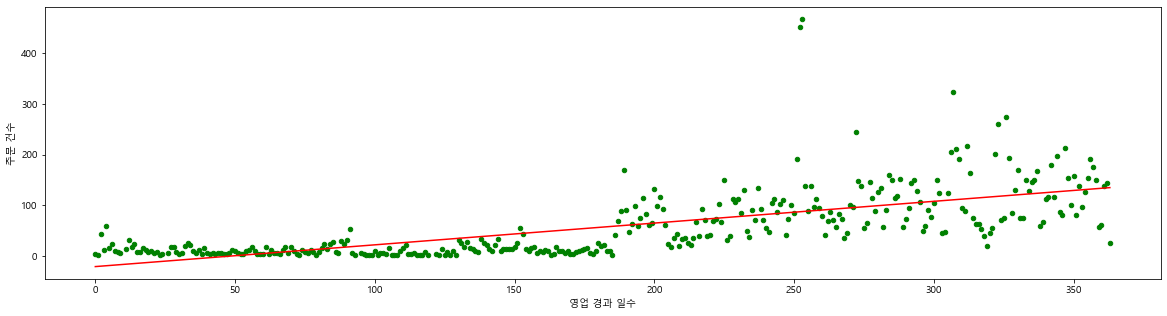

In [93]:
# 회귀선 그래프 그리기
x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값

plt.scatter(x, y, color = 'g', s = 20)
plt.plot(x_minmax, fit_y, color = 'r') # 회귀선 그래프 그리기
plt.xlabel('영업 경과 일수')
plt.ylabel('주문 건수')

plt.show()

In [94]:
# 결정계수(R2) 값 구하기
from sklearn.metrics import r2_score

est_y = np.array(x) * fit_line[0] + fit_line[1] # x의 실제 값들을 회귀식에 대입한 y 추정치

r2 = r2_score(y, est_y) 
print(r2)

0.46804909047877674


Text(150, 250, 'y = 0.4295x -20')

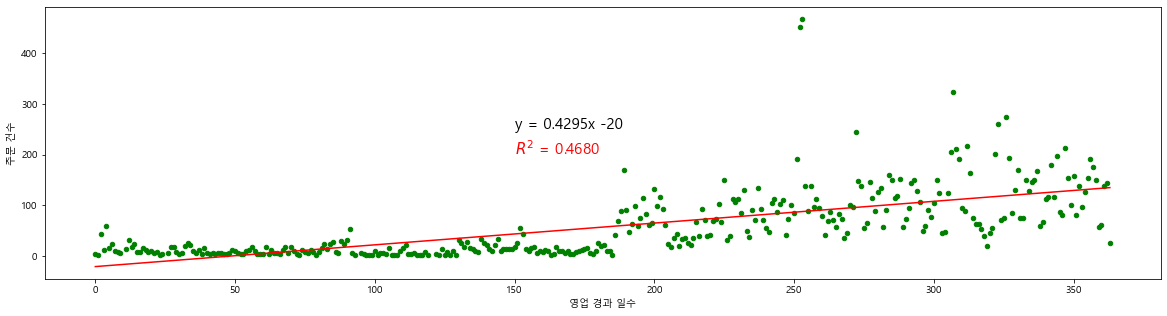

In [95]:
# 결정계수 값과 추세식 텍스트 그래프에 새기기
x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값

plt.scatter(x, y, color = 'g', s = 20)
plt.plot(x_minmax, fit_y, color = 'r') # 회귀선 그래프 그리기
plt.xlabel('영업 경과 일수')
plt.ylabel('주문 건수')
plt.text(150, 200, '$R^2$ = %.4f'%r2, size = 15, color = 'r') 
plt.text(150, 250, 'y = %.4fx %d'%(fit_line[0], fit_line[1]), size = 15)


In [96]:
# 선형 회귀식 구하기 : 영업경과일수와 판매액

import numpy as np

x = df_daily.days # 경과일수
y = df_daily['판매액'] #주문건수

fit_line = np.polyfit(x, y, 1) # x,y 1차원 그래프

print(fit_line) 

[   34983.12432663 -1177263.17203897]


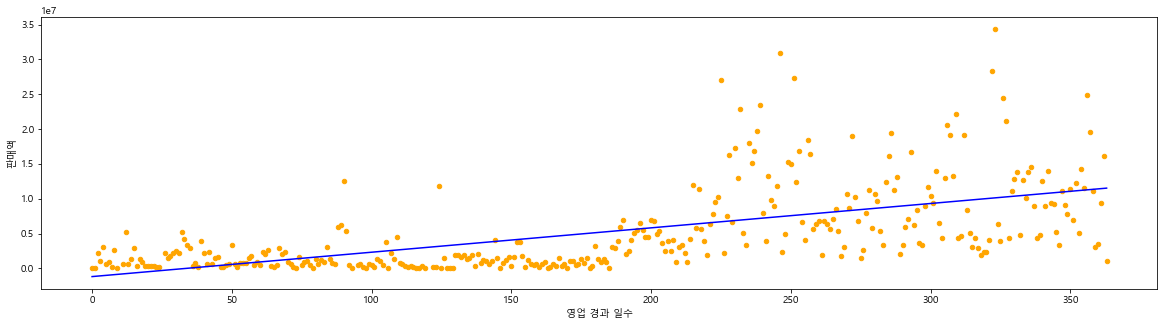

In [97]:
# 회귀선 그래프 그리기
x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값

plt.scatter(x, y, color = 'orange', s = 20)
plt.plot(x_minmax, fit_y, color = 'b') # 회귀선 그래프 그리기
plt.xlabel('영업 경과 일수')
plt.ylabel('판매액')

plt.show()

In [98]:
# 결정계수(R2) 값 구하기
from sklearn.metrics import r2_score

est_y = np.array(x) * fit_line[0] + fit_line[1] # x의 실제 값들을 회귀식에 대입한 y 추정치

r2 = r2_score(y, est_y) 
print(r2)

0.35585932601728365


Text(150, 20000000, 'y = 34983.1243x -1177263')

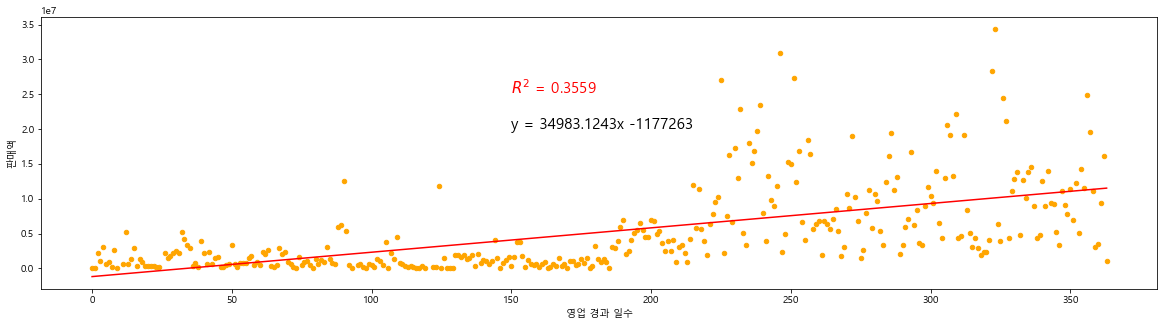

In [99]:
# 결정계수 값과 추세식 텍스트 그래프에 새기기
x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값

fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값

plt.scatter(x, y, color = 'orange', s = 20)
plt.plot(x_minmax, fit_y, color = 'r') # 회귀선 그래프 그리기
plt.xlabel('영업 경과 일수')
plt.ylabel('판매액')
plt.text(150, 25000000, '$R^2$ = %.4f'%r2, size = 15, color = 'r') 
plt.text(150, 20000000, 'y = %.4fx %d'%(fit_line[0], fit_line[1]), size = 15)
